In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import boxcox
import statsmodels.api as sm


In [ ]:
dd = pd.read_csv('/content/drive/MyDrive/IPBills-Az/ip bills.xls Dec_aCSV1.csv')
ff = pd.read_csv('/content/drive/MyDrive/IPBills-Az/ip bills.xls nov_aCSV1.csv')
pp = pd.read_csv('/content/drive/MyDrive/IPBills-Az/ip bills.xls oct_aCSV1.csv')
df = pd.concat([dd, ff, pp], axis=0)
df.reset_index(drop=True, inplace=True)
df


,#SlNo,Bill Type,IPOP,Bill No,Bill Date,Bill Amount,Discount,Net Amount,Paid Amount,Balance Amount,Last Pay Mode,User,MRN,AdmID,Category
0,1,Ip Bill,IP,2504,01-12-2019 10:18,20050,0.0,20050,20050,0,CASH,brundha s-csh,142857,2494,NaN
1,2,Ip Bill,IP,2505,01-12-2019 10:33,5235,0.0,5235,5235,0,CASH,brundha s-csh,468092,2501,NaN
2,3,Ip Bill,IP,2506,01-12-2019 12:32,1995,0.0,1995,1995,0,CARD,brundha s-csh,170560,2498,NaN
3,4,Ip Bill,IP,2507,01-12-2019 13:42,13085,0.0,13085,13085,0,CARD,brundha s-csh,474228,2482,NaN
4,5,Ip Bill,IP,2508,01-12-2019 14:26,14120,NaN,14120,14120,0,TPA,brundha s-csh,473777,2486,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31180,7626,Reg/Cons,OP,552473,31-10-2019 17:31,830,0.0,830,830,0,CARD,shalet d souza-opd,473615,0,NaN
31181,7627,Reg/Cons,OP,552474,31-10-2019 17:55,530,0.0,530,530,0,CASH,shalet d souza-opd,473438,0,NaN
31182,7628,Reg/Cons,OP,552475,31-10-2019 18:03,230,0.0,230,230,0,CASH,bharathi h-opd,432193,0,NaN
31183,7629,Reg/Cons,OP,552476,31-10-2019 18:43,430,0.0,430,430,0,CARD,bharathi h-opd,297000,0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31185 entries, 0 to 31184
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #SlNo           31185 non-null  int64  
 1   Bill Type       31185 non-null  object 
 2   IPOP            31185 non-null  object 
 3   Bill No         31185 non-null  int64  
 4   Bill Date       31185 non-null  object 
 5   Bill Amount     31185 non-null  int64  
 6   Discount        31179 non-null  float64
 7   Net Amount      31185 non-null  int64  
 8   Paid Amount     31185 non-null  int64  
 9   Balance Amount  31185 non-null  int64  
 10  Last Pay Mode   29073 non-null  object 
 11  User            31182 non-null  object 
 12  MRN             31185 non-null  int64  
 13  AdmID           31185 non-null  int64  
 14  Category        2719 non-null   object 
dtypes: float64(1), int64(8), object(6)
memory usage: 3.6+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
#SlNo,31185.0,5400.219368,3308.696794,1.0,2599.0,5198.0,7880.0,12534.0
Bill No,31185.0,129265.974090,204825.338622,2065.0,20406.0,38684.0,46499.0,556878.0
Bill Amount,31185.0,1701.686356,9483.195292,0.0,150.0,435.0,1049.0,544015.0
Discount,31179.0,18.342410,661.376718,0.0,0.0,0.0,0.0,91250.0
Net Amount,31185.0,1683.347475,9304.475142,0.0,150.0,435.0,1045.0,544015.0
Paid Amount,31185.0,1594.880231,9268.804003,0.0,105.0,420.0,912.0,544015.0
Balance Amount,31185.0,88.467244,966.715896,-5000.0,0.0,0.0,0.0,121895.0
MRN,31185.0,369873.975405,147741.572581,3245.0,312529.0,454758.0,473626.0,474924.0
AdmID,31185.0,887.049703,1167.970928,0.0,0.0,0.0,2299.0,2717.0


In [ ]:
df[df['Bill Date'] == '']

In [ ]:
df.isnull().sum()

,0
#SlNo,0
Bill Type,0
IPOP,0
Bill No,0
Bill Date,0
Bill Amount,0
Discount,6
Net Amount,0
Paid Amount,0
Balance Amount,0


In [ ]:
df['Bill Date'] = pd.to_datetime(df['Bill Date'], format="%d-%m-%Y %H:%M")
df['day'] = df['Bill Date'].dt.day
df['month'] = df['Bill Date'].dt.month
df['year'] = df['Bill Date'].dt.year
df

,#SlNo,Bill Type,IPOP,Bill No,Bill Date,Bill Amount,Discount,Net Amount,Paid Amount,Balance Amount,Last Pay Mode,User,MRN,AdmID,Category,day,month,year
0,1,Ip Bill,IP,2504,2019-12-01 10:18:00,20050,0.0,20050,20050,0,CASH,brundha s-csh,142857,2494,NaN,1,12,2019
1,2,Ip Bill,IP,2505,2019-12-01 10:33:00,5235,0.0,5235,5235,0,CASH,brundha s-csh,468092,2501,NaN,1,12,2019
2,3,Ip Bill,IP,2506,2019-12-01 12:32:00,1995,0.0,1995,1995,0,CARD,brundha s-csh,170560,2498,NaN,1,12,2019
3,4,Ip Bill,IP,2507,2019-12-01 13:42:00,13085,0.0,13085,13085,0,CARD,brundha s-csh,474228,2482,NaN,1,12,2019
4,5,Ip Bill,IP,2508,2019-12-01 14:26:00,14120,NaN,14120,14120,0,TPA,brundha s-csh,473777,2486,NaN,1,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31180,7626,Reg/Cons,OP,552473,2019-10-31 17:31:00,830,0.0,830,830,0,CARD,shalet d souza-opd,473615,0,NaN,31,10,2019
31181,7627,Reg/Cons,OP,552474,2019-10-31 17:55:00,530,0.0,530,530,0,CASH,shalet d souza-opd,473438,0,NaN,31,10,2019
31182,7628,Reg/Cons,OP,552475,2019-10-31 18:03:00,230,0.0,230,230,0,CASH,bharathi h-opd,432193,0,NaN,31,10,2019
31183,7629,Reg/Cons,OP,552476,2019-10-31 18:43:00,430,0.0,430,430,0,CARD,bharathi h-opd,297000,0,NaN,31,10,2019


In [ ]:
df['Net Amount'].isnull().sum()

0

In [ ]:
df.sort_values(ascending=False, by='Bill Date', inplace=True)
df

,#SlNo,Bill Type,IPOP,Bill No,Bill Date,Bill Amount,Discount,Net Amount,Paid Amount,Balance Amount,Last Pay Mode,User,MRN,AdmID,Category,day,month,year
5552,5553,Pharmacy,IP,48424,2019-12-31 23:28:00,776,0.0,776,776,0,PREPAID,six flr icu-nur,471846,2522,NaN,31,12,2019
1873,1874,Lab,IP,23926,2019-12-31 23:28:00,2480,0.0,2480,2480,0,TPA,sunitha-lab,257382,2717,UNITED HEALTH CARE PAREKH (UHC),31,12,2019
5871,5872,Pharmacy,IP,48423,2019-12-31 22:58:00,584,0.0,584,584,0,TPA,casuality-cas,257382,2717,UNITED HEALTH CARE PAREKH (UHC),31,12,2019
2295,2296,Pharmacy,OP,48422,2019-12-31 22:49:00,17,0.0,17,17,0,CASH,priyanka-mrd,352871,0,NaN,31,12,2019
8194,8195,Procedure,OP,17670,2019-12-31 22:47:00,400,0.0,400,400,0,CASH,priyanka-mrd,352871,0,NaN,31,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23731,177,Lab,IP,17817,2019-10-11 01:03:00,2700,0.0,2700,2700,0,PREPAID,midhun v-lab,473086,2071,NaN,11,10,2019
25405,1851,Pharmacy,OP,34373,2019-10-11 00:12:00,50,0.0,50,50,0,CASH,john samuel-mrd,473289,0,NaN,11,10,2019
28230,4676,Procedure,OP,13052,2019-10-11 00:09:00,450,0.0,450,450,0,CASH,john samuel-mrd,473289,0,NaN,11,10,2019
29667,6113,Reg/Cons,OP,550946,2019-10-11 00:07:00,100,0.0,100,100,0,CASH,john samuel-mrd,473289,0,NaN,11,10,2019


In [ ]:
df['Last Pay Mode'] = df['Last Pay Mode'].fillna(df['Last Pay Mode'].mode()[0])

In [ ]:
df.drop('Category', axis=1, inplace=True)

In [ ]:
df['Discount'] = df['Discount'].fillna(0)
df['Discount'] = df['Discount'].astype(int)

In [ ]:
df['Bill Date'].isnull().sum(), df['Net Amount'].isnull().sum()

(0, 0)

In [ ]:
df = df[['Bill Date', 'Net Amount', 'day', 'month', 'year', 'Last Pay Mode']]
df

,Bill Date,Net Amount,day,month,year,Last Pay Mode
5552,2019-12-31 23:28:00,776,31,12,2019,PREPAID
1873,2019-12-31 23:28:00,2480,31,12,2019,TPA
5871,2019-12-31 22:58:00,584,31,12,2019,TPA
2295,2019-12-31 22:49:00,17,31,12,2019,CASH
8194,2019-12-31 22:47:00,400,31,12,2019,CASH
...,...,...,...,...,...,...
23731,2019-10-11 01:03:00,2700,11,10,2019,PREPAID
25405,2019-10-11 00:12:00,50,11,10,2019,CASH
28230,2019-10-11 00:09:00,450,11,10,2019,CASH
29667,2019-10-11 00:07:00,100,11,10,2019,CASH


In [ ]:
df = df.groupby(['Bill Date'])['Net Amount'].sum().reset_index()
df

,Bill Date,Net Amount
0,2019-10-11 00:03:00,1400
1,2019-10-11 00:07:00,100
2,2019-10-11 00:09:00,450
3,2019-10-11 00:12:00,50
4,2019-10-11 01:03:00,2700
...,...,...
23616,2019-12-31 22:44:00,500
23617,2019-12-31 22:47:00,400
23618,2019-12-31 22:49:00,17
23619,2019-12-31 22:58:00,584


In [ ]:
df['Bill Date'] = pd.to_datetime(df['Bill Date'])
df.set_index('Bill Date', inplace=True)
y = df['Net Amount'].resample('D').mean().ffill()

In [ ]:
y

,Net Amount
Bill Date,
2019-10-11,2289.376119
2019-10-12,2035.335244
2019-10-13,1776.611511
2019-10-14,2188.884615
2019-10-15,1804.258760
...,...
2019-12-27,2216.195335
2019-12-28,2002.523529
2019-12-29,765.938272


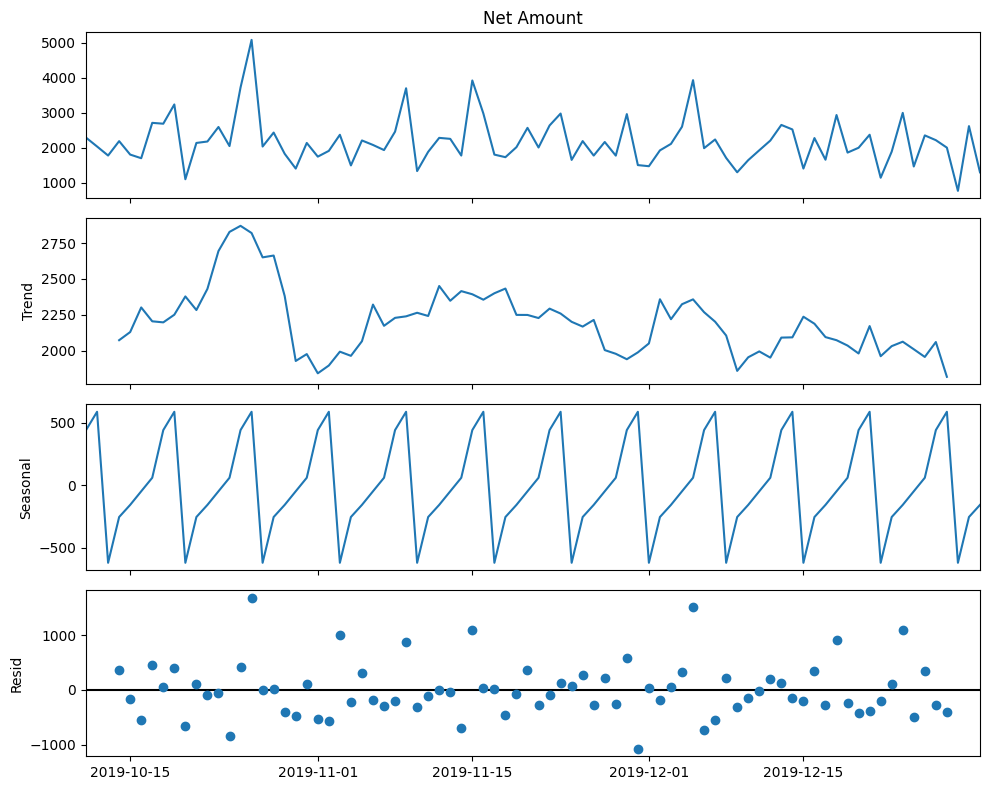

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

There is seasonality we can do differencing, but data points are very less for that


In [ ]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e: # Catch any exception. It is good practice to catch the specific exception you expect.
            print(f'ARIMA{param}x{param_seasonal}12 - Error: {e}') #print the error
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1484.8039445427496
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1213.868280472814
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1150.6602309708278
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:922.4150029371558
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1164.1202921572428
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1142.2052878261497
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:953.4447611326842
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:923.7721248296116
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1408.8467059229367
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1167.3419389816365
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1135.0752328891097
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:908.7478004892812
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1162.8906534371936
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1126.6213259645435
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:955.4373437593451
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:910.3222322948204
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1326.589217962499
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1132.9117185400992


In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0867      0.139      0.625      0.532      -0.185       0.359
ma.L1         -1.0000      0.233     -4.298      0.000      -1.456      -0.544
ar.S.L12      -0.3162      0.085     -3.728      0.000      -0.482      -0.150
sigma2      3.961e+05   5.87e-07   6.74e+11      0.000    3.96e+05    3.96e+05


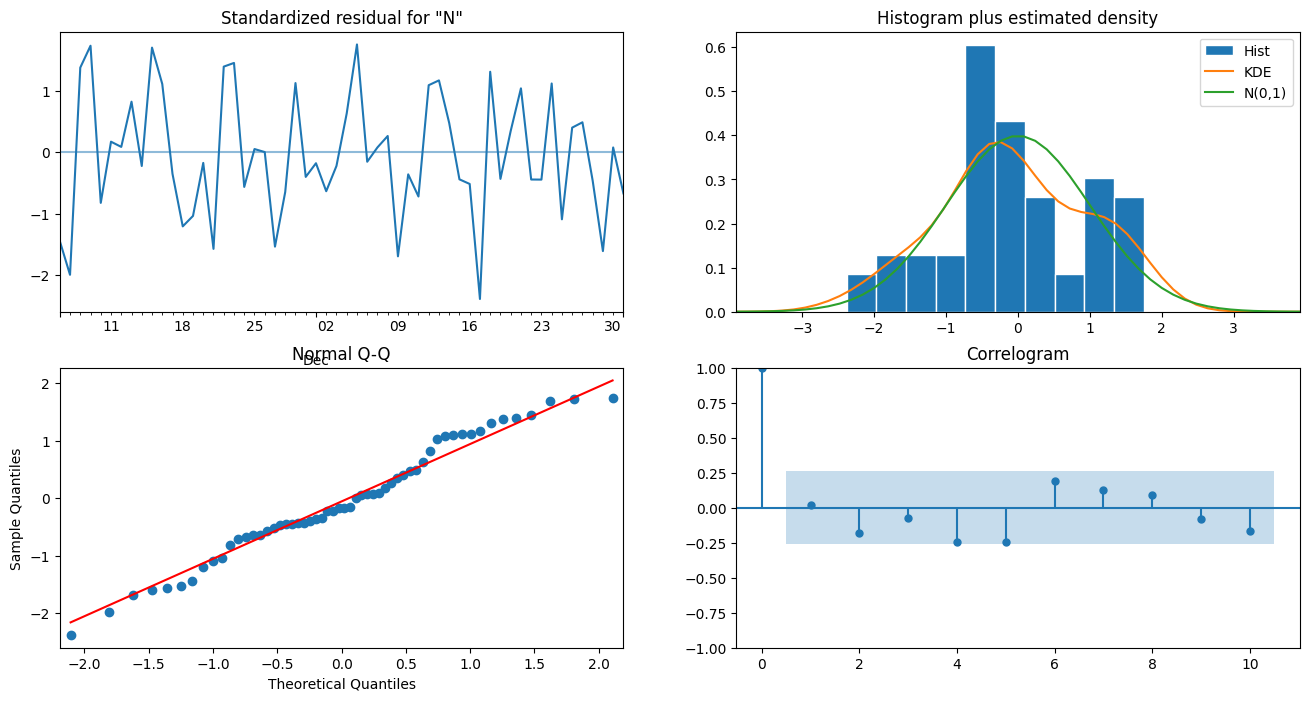

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()


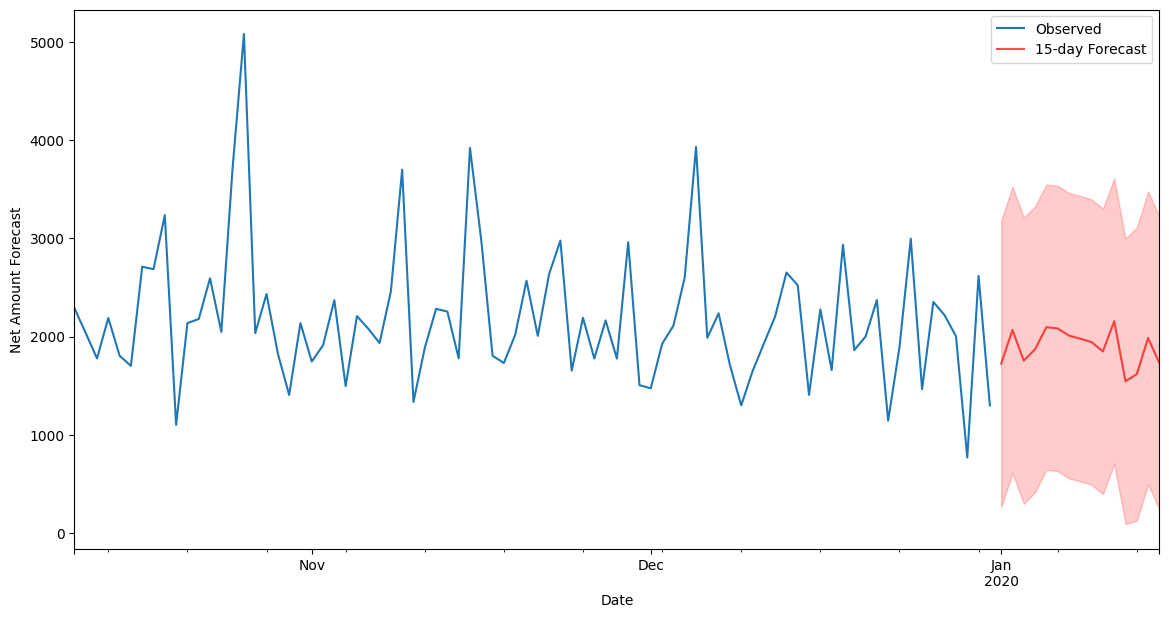

In [ ]:
# pred = results.get_prediction(start=pd.to_datetime('2019-10-11'), dynamic=False)
# pred_ci = pred.conf_int()
# ax = y['2019':].plot(label='observed')
# pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.2)
# ax.set_xlabel('Date')
# ax.set_ylabel('Net Amount Forecast')
# plt.legend()
# plt.show()

forecast_steps = 15
forecast = results.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()
forecast_index = pd.date_range(start=y.index[-1], periods=forecast_steps + 1, freq='D')[1:]
ax = y.plot(label='Observed', figsize=(14, 7))
forecast.predicted_mean.plot(ax=ax, label='15-day Forecast', color='red', alpha=0.7)

ax.fill_between(forecast_index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1],
                color='red', alpha=0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Net Amount Forecast')
plt.legend()
plt.show()


In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-10-11':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 918434.5


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 958.35
